In [1]:
import os
import pandas as pd

fname = os.path.join('data', 'Sampling_Data.xlsx')

df = pd.read_excel(fname)

In [2]:
import os
import geopandas

path = os.path.join('data', 'BTS_SHP')
bts = geopandas.read_file(path)
bts = bts['geometry'].values.tolist()[0]

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

states = NaturalEarthFeature(category='cultural', scale='10m',
                             facecolor='lightgray',
                             name='admin_1_states_provinces')


def make_map(figsize=(9, 7.5), projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=projection))
    return fig, ax

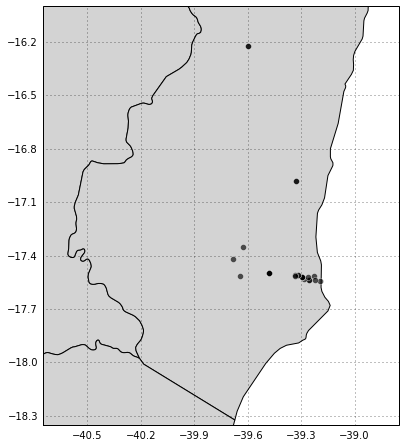

In [4]:
projection = ccrs.PlateCarree()

extent = [-40.75, -38.75, -18.35, -16]

kw = dict(color='black', marker='o', alpha=0.65, linestyle='none', markeredgecolor='white')

fig, ax = make_map(projection=projection)

ax.plot(df['Longitude'], df['Latitude'], **kw)
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
ax.add_feature(states)
ax.set_extent(extent)

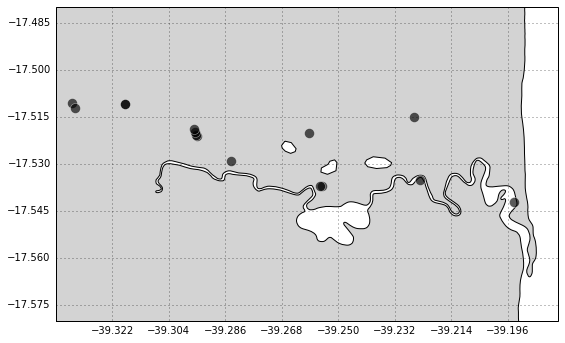

In [5]:
fig, ax = make_map(figsize=(9, 9))

kw = dict(
    color='black',
    marker='o',
    alpha=0.65,
    linestyle='none',
    markeredgecolor='white',
    markersize=10,
)

ax.plot(df['Longitude'], df['Latitude'], **kw)

ax.set_extent([-39.34, -39.18, -17.58, -17.48])
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False

shp = ax.add_geometries(
    bts,
    projection,
    facecolor='lightgray',
    edgecolor='black',
    linewidth=0.5
)

In [6]:
import shapely.geometry as sgeom
from cartopy.io.shapereader import Reader, natural_earth

kw = dict(resolution='50m', category='cultural')
shp = natural_earth(name='admin_0_countries_lakes', **kw)
countries = Reader(shp)

shp = natural_earth(name='admin_1_states_provinces', **kw)
states = Reader(shp)

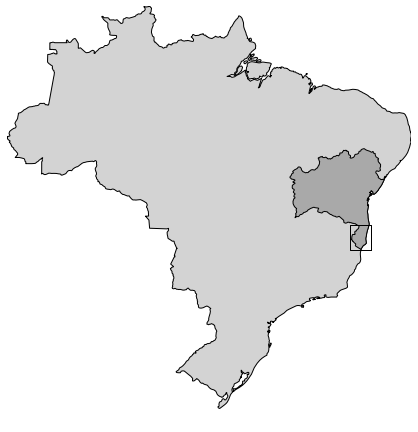

In [7]:
fig, ax = make_map(projection=projection)

for record, country in zip(countries.records(), countries.geometries()):
    name = record.attributes['name']
    if name == 'Brazil':
        ax.add_geometries([country], ccrs.PlateCarree(), linewidth=0.5,
                          facecolor='LightGray', edgecolor='black')

for record, state in zip(states.records(), states.geometries()):
    name = record.attributes['name']
    if name == 'Bahia':
        ax.add_geometries([state], ccrs.PlateCarree(), linewidth=0.5,
                          facecolor='DarkGray', edgecolor='black')

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.set_extent([-73.9844, -34.792,
               -33.7525, 5.25139], ccrs.Geodetic())

extent_box = sgeom.box(extent[0], extent[2], extent[1], extent[3])
feat = ax.add_geometries([extent_box], projection, color='none',
                         edgecolor='black', linewidth=1)